In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [26]:
data = pd.read_csv("C:/ecommerce_data.csv/datas.csv")
data.head()


,CustomerID,Product,Category,Price,Quantity,Date
0,101,Mobile,Electronics,15000,1,2024-01-02
1,102,Shoes,Fashion,2000,2,2024-01-03
2,101,Headphones,Electronics,1500,1,2024-01-05
3,103,T-shirt,Fashion,800,3,2024-01-06
4,104,Laptop,Electronics,55000,1,2024-01-07


In [27]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  7 non-null      int64 
 1   Product     7 non-null      object
 2   Category    7 non-null      object
 3   Price       7 non-null      int64 
 4   Quantity    7 non-null      int64 
 5   Date        7 non-null      object
dtypes: int64(3), object(3)
memory usage: 468.0+ bytes


,CustomerID,Price,Quantity
count,7.000000,7.000000,7.000000
mean,102.000000,11142.857143,1.571429
std,1.154701,19988.484780,0.786796
min,101.000000,700.000000,1.000000
25%,101.000000,1150.000000,1.000000
50%,102.000000,2000.000000,1.000000
75%,102.500000,9000.000000,2.000000
max,104.000000,55000.000000,3.000000


In [29]:
data["Date"] = pd.to_datetime(data["Date"])
data["TotalAmount"] = data["Price"] * data["Quantity"]
data.head()



,CustomerID,Product,Category,Price,Quantity,Date,TotalAmount
0,101,Mobile,Electronics,15000,1,2024-01-02,15000
1,102,Shoes,Fashion,2000,2,2024-01-03,4000
2,101,Headphones,Electronics,1500,1,2024-01-05,1500
3,103,T-shirt,Fashion,800,3,2024-01-06,2400
4,104,Laptop,Electronics,55000,1,2024-01-07,55000


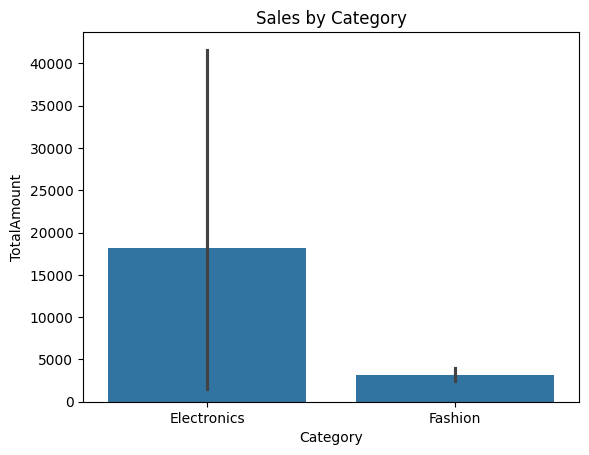

In [30]:
sns.barplot(x="Category", y="TotalAmount", data=data)
plt.title("Sales by Category")
plt.show()


In [31]:
top_products = data.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
print(top_products)


Product
T-shirt       3
Mouse         2
Shoes         2
Mobile        1
Laptop        1
Headphones    1
Watch         1
Name: Quantity, dtype: int64


In [32]:
top_customers = data.groupby("CustomerID")["TotalAmount"].sum()
print(top_customers)


CustomerID
101    17900
102     7000
103     2400
104    55000
Name: TotalAmount, dtype: int64


In [33]:
customer_product = pd.crosstab(data["CustomerID"], data["Product"])
print(customer_product)


Product     Headphones  Laptop  Mobile  Mouse  Shoes  T-shirt  Watch
CustomerID                                                          
101                  1       0       1      1      0        0      0
102                  0       0       0      0      1        0      1
103                  0       0       0      0      0        1      0
104                  0       1       0      0      0        0      0


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(customer_product)
print(similarity)


similarity = cosine_similarity(customer_product)
print(similarity)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
